In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas
import scipy

In [3]:
app_events = pandas.read_csv("app_events.csv")
app_labels = pandas.read_csv("app_labels.csv")
events = pandas.read_csv("events.csv")
gender_age_train = pandas.read_csv("gender_age_train.csv")
gender_age_test = pandas.read_csv("gender_age_test.csv")
label_categories = pandas.read_csv("label_categories.csv")
phone_brand_device_model = pandas.read_csv("phone_brand_device_model.csv")

In [4]:
print(app_events.head(5))

   event_id               app_id  is_installed  is_active
0         2  5927333115845830913             1          1
1         2 -5720078949152207372             1          0
2         2 -1633887856876571208             1          0
3         2  -653184325010919369             1          1
4         2  8693964245073640147             1          1


In [5]:
print(app_labels.head(5))

                app_id  label_id
0  7324884708820027918       251
1 -4494216993218550286       251
2  6058196446775239644       406
3  6058196446775239644       407
4  8694625920731541625       406


In [6]:
print(events.head(5))

   event_id            device_id            timestamp  longitude  latitude
0         1    29182687948017175  2016-05-01 00:55:25     121.38     31.24
1         2 -6401643145415154744  2016-05-01 00:54:12     103.65     30.97
2         3 -4833982096941402721  2016-05-01 00:08:05     106.60     29.70
3         4 -6815121365017318426  2016-05-01 00:06:40     104.27     23.28
4         5 -5373797595892518570  2016-05-01 00:07:18     115.88     28.66


In [7]:
print(gender_age_train.head(5))

             device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31


In [8]:
print(label_categories.head(5))

   label_id           category
0         1                NaN
1         2     game-game type
2         3   game-Game themes
3         4     game-Art Style
4         5  game-Leisure time


In [9]:
gender_age_train["group"].unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

## Start analyzing data (time stamp & categories)

### Analyzing timestamp :
Correlate usage time with gender and age:
+ a) correlate time with age and gender
+ b) correlate date with age and gender

In [10]:
import matplotlib.dates as md
import datetime as dt
import time

type(events["timestamp"])

pandas.core.series.Series

In [11]:
events["date"]=events["timestamp"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").date())
events["time"]=events["timestamp"].apply(lambda x: dt.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").time())

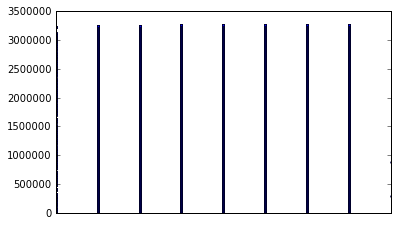

In [24]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter

years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
fig, ax = plt.subplots()
ax.plot_date(events["date"], events["event_id"], markersize=2)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
#ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()
plt.show()

#xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
#xfmt = md.DateFormatter('%Y-%m-%d')
#ax.xaxis.set_major_formatter(xfmt)
#range_low = 1090
#range_up = 1160
#plt.scatter(events["date"][range_low:range_up],events["device_id"][range_low:range_up],s=2)
#plt.show()

In [15]:
events["date"][0]

datetime.date(2016, 5, 1)